## Step 1: Exploratory data analysis

**Project**: Predicting Bus Ridership \
**Team**: T20 - Eurus Li, Garrett Kent, Kate Munkacsy

### A. Initial setup

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

# Optional: Set visualization aesthetics
sns.set(style="whitegrid")

### B. Import data

In [30]:
ridership_df = pd.read_csv("Data/ridership.csv")
ridership_df['year_month'] = ridership_df['year_month'].astype(str)
ridership_df.head()

,_id,route,ridership_route_code,route_full_name,current_garage,mode,month_start,year_month,day_type,avg_riders,day_count,total_precip,avg_temp
0,1,1,001,1 - FREEPORT ROAD,Ross,Bus,2017-01-01,201701,SAT.,969.50,4,3.43,33.6
1,2,4,004,4 - TROY HILL,Ross,Bus,2017-01-01,201701,SAT.,218.25,4,3.43,33.6
2,3,6,006,6 - SPRING HILL,Ross,Bus,2017-01-01,201701,SAT.,495.50,4,3.43,33.6
3,4,8,008,8 - PERRYSVILLE,Ross,Bus,2017-01-01,201701,SAT.,1480.00,4,3.43,33.6
4,5,11,011,11 - FINEVIEW,Ross,Bus,2017-01-01,201701,SAT.,208.00,4,3.43,33.6


In [32]:
stop_usage_df = pd.read_csv("Data/stop_usage.csv")
stop_usage_df.head()

,clever_id,stop_id,stop_name,direction,routes_ser,latitude,longitude,mode,shelter,stop_type,...,route_name,serviceday,total_ons,total_offs,days,avg_ons,avg_offs,total_precip,avg_temp,ZIP
0,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,...,69,Sat,12.0,0.0,4,3.000000,0.00,2.45,71.9,15085
1,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,...,69,Sun,14.0,0.0,6,2.333333,0.00,2.45,71.9,15085
2,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,...,69,Weekday,64.0,1.0,20,3.200000,0.05,2.45,71.9,15085
3,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,...,P69,Weekday,39.0,0.0,20,1.950000,0.00,2.45,71.9,15085
4,7858,E02110,5TH ST AT CAVIT AVE,Inbound,"69, P69",40.3858,-79.76,Bus,No Shelter,Bus Stop,...,69,Sat,11.0,0.0,4,2.750000,0.00,3.52,35.4,15085


### C. Descriptive statistics

In [35]:
def desc_stat(title, df, columns):
    print(title)
    print()
    print(f"observations: {df.shape[0]}")
    print(f"columns: {df.shape[1]}")
    print()
    for i in columns:
        print()
        print(f"{i} column:")
        print()
        print(df[i].describe())
        print(f"Null values: {df[i].isna().sum()}")

In [37]:
desc_stat("Ridership Descriptive Statistics:", ridership_df, ["route", "year_month", "avg_riders"])

Ridership Descriptive Statistics:

observations: 22317
columns: 13


route column:

count     22316
unique      108
top           1
freq        282
Name: route, dtype: object
Null values: 1

year_month column:

count      22317
unique        94
top       202407
freq         247
Name: year_month, dtype: object
Null values: 0

avg_riders column:

count    22317.000000
mean      1189.182466
std       1394.175838
min         -1.954545
25%        340.750000
50%        727.238095
75%       1486.000000
max      11510.250000
Name: avg_riders, dtype: float64
Null values: 0


In [39]:
desc_stat("Bus Stop Usage Descriptive Statistics:", stop_usage_df, ["direction", "routes_ser", "latitude", "longitude", "route_name" , "serviceday" , "total_ons", "total_offs", "avg_ons", "avg_offs"])

Bus Stop Usage Descriptive Statistics:

observations: 107611
columns: 22


direction column:

count      107611
unique          3
top       Inbound
freq        41128
Name: direction, dtype: object
Null values: 0

routes_ser column:

count     107611
unique       464
top           14
freq        1524
Name: routes_ser, dtype: object
Null values: 0

latitude column:

count    107611.000000
mean         40.440296
std           0.049587
min          40.273100
25%          40.415300
50%          40.443000
75%          40.462900
max          40.667600
Name: latitude, dtype: float64
Null values: 0

longitude column:

count    107611.000000
mean        -79.956180
std           0.082136
min         -80.258900
25%         -80.003600
50%         -79.959100
75%         -79.899300
max         -79.705500
Name: longitude, dtype: float64
Null values: 0

route_name column:

count     107611
unique        97
top           59
freq        4023
Name: route_name, dtype: object
Null values: 0

serviceday colu

### D. Visualizations

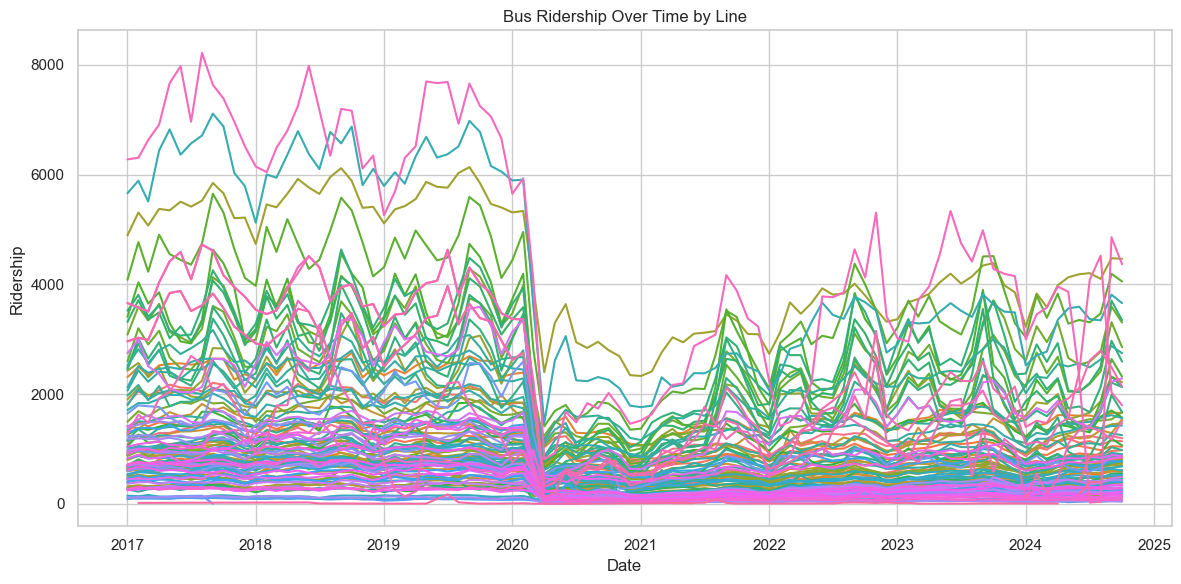

In [42]:
# Convert date column to datetime
ridership_df['month_start'] = pd.to_datetime(ridership_df['month_start'])

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=ridership_df, x='month_start', y='avg_riders', hue='route', errorbar=None)
plt.legend().remove()

plt.title("Bus Ridership Over Time by Line")
plt.xlabel("Date")
plt.ylabel("Ridership")
plt.tight_layout()
plt.show()

In [43]:
ridership_filtered = ridership_df[ridership_df['month_start'] > '2023-01-01']

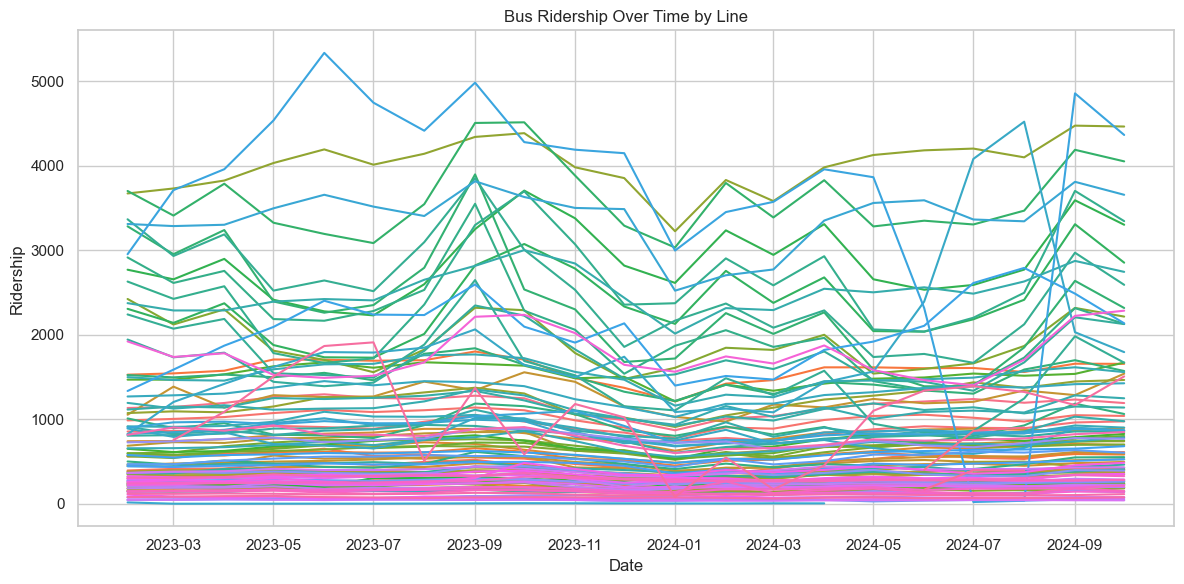

In [44]:
# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=ridership_filtered, x='month_start', y='avg_riders', hue='route', errorbar=None)
plt.legend().remove()

plt.title("Bus Ridership Over Time by Line")
plt.xlabel("Date")
plt.ylabel("Ridership")
plt.tight_layout()
plt.show()